In [1]:
import random
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.manifold import TSNE
import seaborn as sns
import os
import umap
from sklearn.decomposition import PCA
from typing import Optional, Tuple, Any
from matplotlib.figure import Figure, SubplotParams
from matplotlib import ticker, pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle

2024-10-12 13:01:57.355269: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-12 13:01:57.356741: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-12 13:01:57.378038: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-12 13:01:57.378424: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-12 13:01:57.763542: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

# 1 Read the data

In [2]:
filepath = '/home/dldx/DATA/JXDATA/GitHubProjects/GraphCySoM/datasets/merged.sdf'
mols = Chem.SDMolSupplier(filepath)
# Make sure that all molecules are not empty.
mols = [mol for mol in mols if mol is not None]
# Set up a random seed to ensure the results are reproducible.
random.seed(42)
train_size = 544
train_datapath = '/home/dldx/DATA/JXDATA/GitHubProjects/GraphCySoM/datasets/train_datsets.pkl'
fr = open(train_datapath, 'rb')
train_data = pickle.load(fr)

# 2 Generate fingerprints

In [3]:
for mol in mols:
    Chem.GetSymmSSSR(mol)  # This will initialize the ring information and avoid error messages: “RingInfo not initialized”
# Generate molecular fingerprints
fingerprints_mols = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in mols]
# Convert fingerprints to NumPy arrays for easy computation and clustering
fp_array_mols = np.array([list(fp) for fp in fingerprints_mols])  # Convert fingerprints to binary vector form


[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerat

# 3 Dimensionality reduction

In [4]:
tsne = TSNE(n_components=2)
fp_tsne = tsne.fit_transform(fp_array_mols)
random.shuffle(fp_tsne)
fp_tsne_train = fp_tsne[:train_size]
fp_tsne_test = fp_tsne[train_size:]

reducer = umap.UMAP(n_components=2)
fp_umap = reducer.fit_transform(fp_array_mols)
random.shuffle(fp_umap)
fp_umap_train = fp_umap[:train_size]
fp_umap_test = fp_umap[train_size:]

pca = PCA(n_components=2)
fp_pca = pca.fit_transform(fp_array_mols)
random.shuffle(fp_pca)
fp_pca_train = fp_pca[:train_size]
fp_pca_test = fp_pca[train_size:]

# 4 Draw

In [5]:
def draw_lower_dimension(
        data_list,
        title_list,
        xlabel_list,
        ylabel_list,
        label_list,
        color_list,
        save_dir,

        pylot: Any = plt,
        figsize: Optional[Tuple[float, float]] = (5, 5),
        dpi: int = 600,
        facecolor: str = 'white',
        edgecolor: str = 'white',
        linewidth: float = 0.2,
        frameon: bool = True,
        subplotpars: Optional[SubplotParams] = None,
        tight_layout: Optional[bool] = True,
        layout: Optional[str] = None,

        nrows: int = 1,
        ncols: int = 1,
        top: Optional[float] = None,
        bottom: Optional[float] = None,
        left: Optional[float] = None,
        right: Optional[float] = None,
        wspace: Optional[float] = None,
        hspace: Optional[float] = None,
        width_ratios: Any = None,
        height_ratios: Any = None,

        polar: bool = False,
        projection: str = None,
        sharex: Any = None,
        sharey: Any = None,
        label: str = None,
):
    figsize = (figsize[0] * len(data_list), figsize[1])
    figure = pylot.figure(
        figsize=figsize,
        dpi=dpi,
        facecolor=facecolor,
        edgecolor=edgecolor,
        linewidth=linewidth,
        frameon=frameon,
        subplotpars=subplotpars,
        tight_layout=tight_layout,
        layout=layout,
    )
    ncols = ncols * len(data_list)
    gs = GridSpec(
        nrows=nrows,
        ncols=ncols,
        figure=figure,
        top=top,
        bottom=bottom,
        left=left,
        right=right,
        wspace=wspace,
        hspace=hspace,
        width_ratios=width_ratios,
        height_ratios=height_ratios,
    )
    ax = {}
    for i in range(nrows):
        for j in range(ncols):
            ax[(i, j)] = figure.add_subplot(
                gs[i, j],
                polar=polar,
                projection=projection,
                sharex=sharex,
                sharey=sharey,
                label=label,
                facecolor=facecolor,
            )
    for index, items in enumerate(data_list):
        # ax[(0, index)].set_title(title_list[index])
        ax[(0, index)].set_xlabel(xlabel_list[index])
        ax[(0, index)].set_ylabel(ylabel_list[index])
        sns.scatterplot(
            x=items[0][:, 0],
            y=items[0][:, 1],
            label=label_list[0],
            c=color_list[0],
            legend='full',
            ax=ax[(0, index)]
        )
        sns.scatterplot(
            x=items[1][:, 0],
            y=items[1][:, 1],
            label=label_list[1],
            c=color_list[1],
            legend='full',
            ax=ax[(0, index)]
        )
        ax[(0, index)].legend(loc= 'lower right', ncol=len(color_list))
    # ax[(0, 0)].set_xlim(-2, 3)
    # ax[(0, 2)].set_xlim(0, 8)
    plt.savefig(os.path.join(save_dir, 'lower_dimension.png'))
    plt.show()

# 5 Eliminate outliers

In [6]:
def replace_outliers_with_mean(arr, standard_deviation: int = 2):
    # The mean and standard deviation are calculated
    mean = np.mean(arr)
    std_dev = np.std(arr)
    
    # Define the threshold for outliers, here assuming that any value that is more than 2 standard deviations away from the mean is an outlier
    threshold = standard_deviation * std_dev
    
    # Iterate through the array, replacing outliers with averages
    for i in range(len(arr)):
        if abs(arr[i] - mean) > threshold:
            arr[i] = mean
            
    return arr

In [7]:
fp_umap_train[:, 0] = replace_outliers_with_mean(fp_umap_train[:, 0], 3)
fp_umap_train[:, 1] = replace_outliers_with_mean(fp_umap_train[:, 1], 4)
fp_pca_test[:, 0] = replace_outliers_with_mean(fp_pca_test[:, 0], 3)
dataList = [
    [fp_pca_train, fp_pca_test],
    [fp_tsne_train, fp_tsne_test],
    [fp_umap_train, fp_umap_test],
]

# 6 Draw the implementation

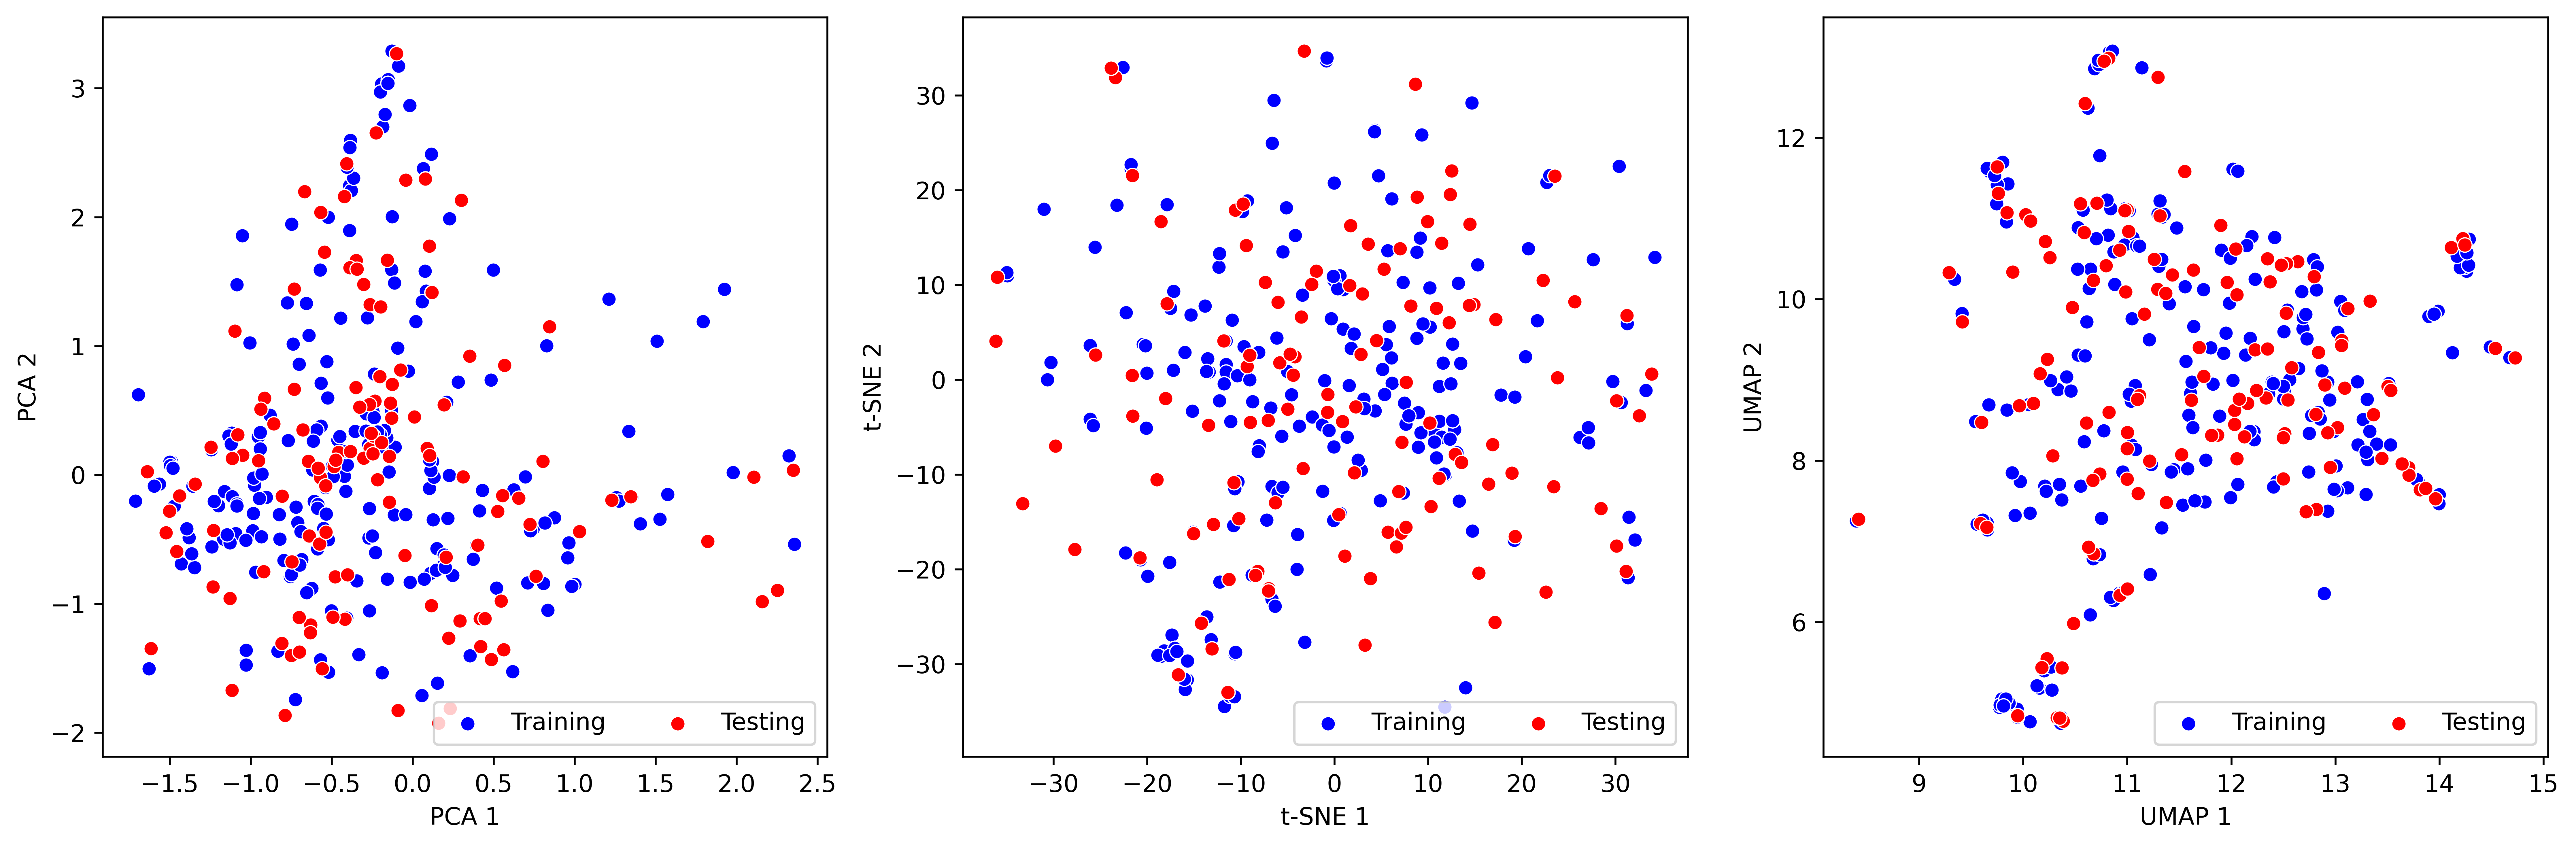

In [8]:
draw_lower_dimension(
    dataList,
    ['PCA', 't-SNS', 'UMAP', ],
    ['PCA 1', 't-SNE 1', 'UMAP 1', ],
    ['PCA 2', 't-SNE 2', 'UMAP 2', ],
    ['Training', 'Testing'],
    ['blue', 'red'],
    save_dir='/home/dldx/DATA/JXDATA/gp120/images'
)